ML 10. Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [5]:

# Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='unicode_escape')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
# Basic info
print(df.info())
print(df.describe())
print(df.columns)

# Drop non-numeric and irrelevant columns
df_clean = df.select_dtypes(include=[np.number]).dropna()

# Alternatively, choose a few important numerical features
features = df_clean[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERNUMBER']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print("Data shape after scaling:", X_scaled.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


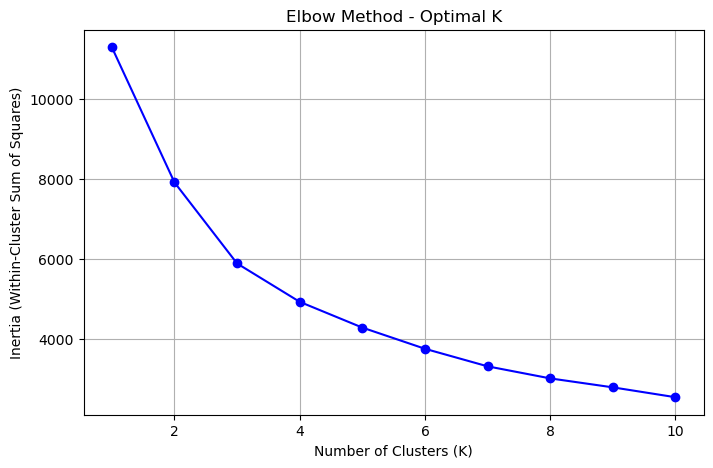

In [9]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', color='blue')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()


In [11]:
# Choose K based on elbow result (example: K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[-0.70854061  0.46259617 -0.26929189  0.82525847]
 [-0.43685254  0.41359923 -0.13496959 -1.01228217]
 [ 1.01181348  0.67408353  1.27088991  0.22337467]
 [ 0.04001807 -1.44645947 -0.87598836  0.05091556]]


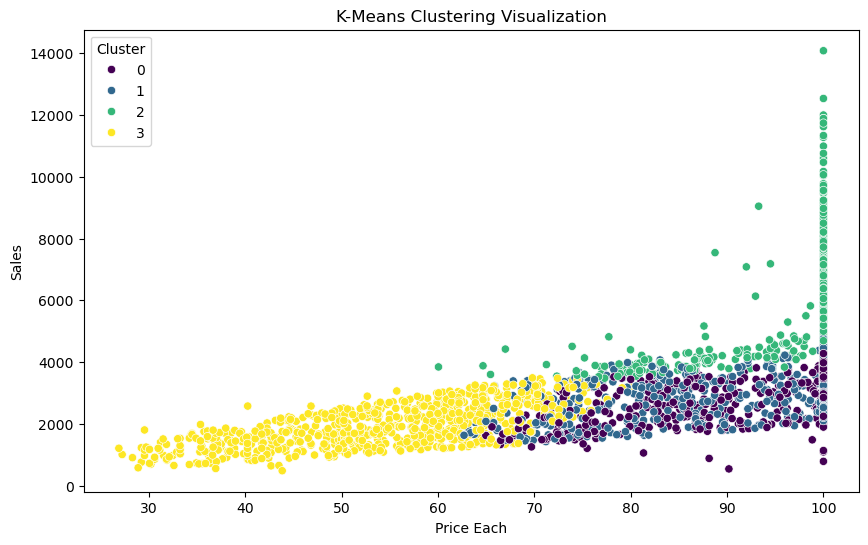

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PRICEEACH', y='SALES', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.legend(title='Cluster')
plt.show()


In [15]:
cluster_summary = df.groupby('Cluster')[['SALES', 'PRICEEACH', 'QUANTITYORDERED']].mean()
print("Cluster Summary:\n", cluster_summary)


Cluster Summary:
                SALES  PRICEEACH  QUANTITYORDERED
Cluster                                         
0        3056.839670  93.000440        28.183673
1        3304.355601  91.949036        30.842179
2        5894.282221  97.255283        44.947586
3        1941.139275  54.471409        35.495302
